In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('../')
from scripts.cosine_smoothed_mask import cosine_smoothed_mask
from scripts.generate_noise import generate_noise
from scripts.sigma_noise import sigma_noise

In [2]:
nside=256
factor=1e7

freqs=np.arange(544,1088,step=1)
nfreqs=len(freqs)

lmax=3*nside -1
D=13.5 #size of dish in meteres
mask = cosine_smoothed_mask(nside)
mask= (mask*(-1))+1
fsky=np.mean(mask)
print(fsky)
sigma=sigma_noise(nside, fsky)
noise=generate_noise(nside, sigma, 10)
print(noise.shape)
print(sigma)

0.10448023039132469
(10, 786432)
0.00013353386332107953


In [3]:
smoothed_hi_maps=np.load("smoothed_hi_maps.npy")

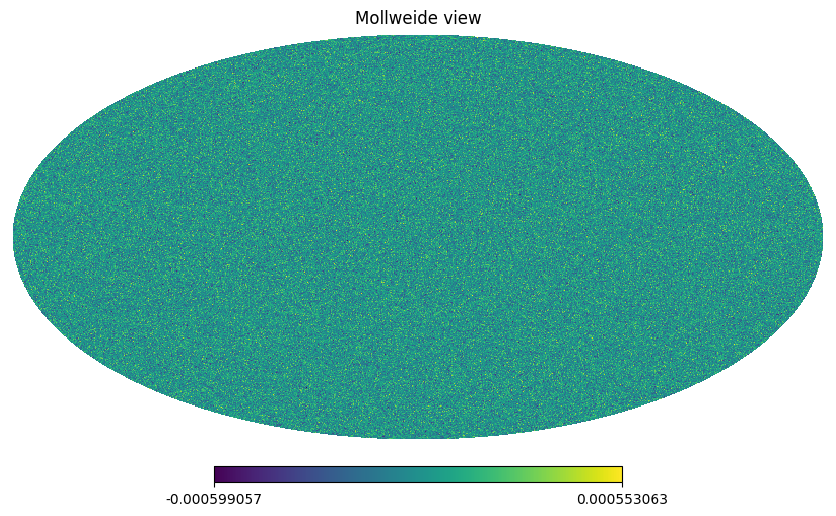

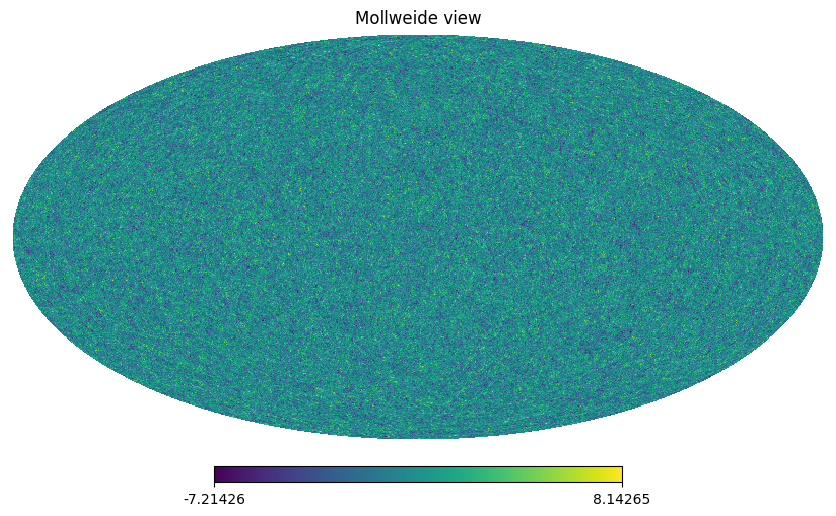

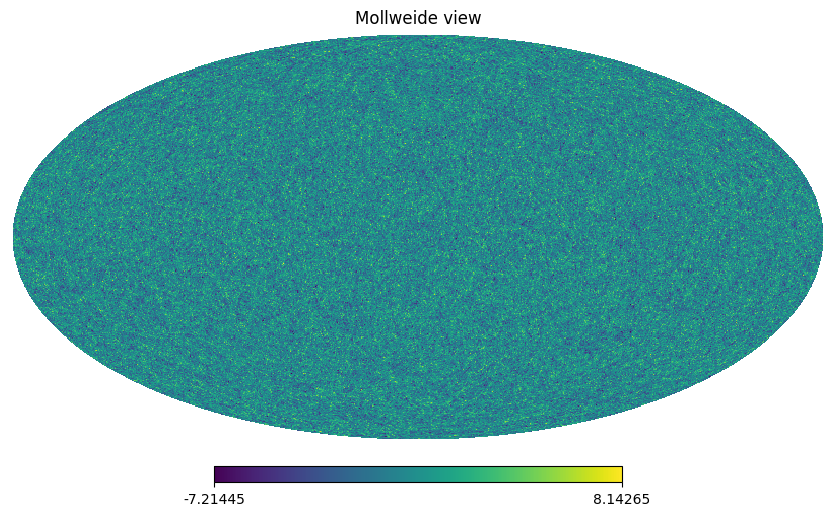

In [4]:
hp.mollview(noise[0])
hp.mollview(smoothed_hi_maps[0])
hp.mollview(noise[0]+smoothed_hi_maps[0])

In [23]:
def add_noise(maps_in, noise_maps, nfreqs, lmax):
    """
    Add noise to the input maps.

    Args:
        maps_in (np.ndarray): input smoothed and masked maps
        noise_maps (np.ndarray): gaussian noise maps

    Returns:
        noisy_maps (np.ndarray)
        noisy_als (np.ndarray)
    """
    almsize= hp.Alm.getsize(lmax)
    noisy_maps= maps_in+ noise_maps
    noisy_alms=np.zeros((nfreqs, almsize), dtype=complex)
    for nf in range(nfreqs):
        noisy_alms[nf,:] = hp.map2alm(noisy_maps[nf,:])
    
    return noisy_maps, noisy_alms

In [15]:
print((noise[0]+smoothed_hi_maps[0]).shape)
x=noise+smoothed_hi_maps[:10]
alm=hp.map2alm(x[0])
print(alm.shape)

(786432,)
(295296,)


In [24]:
noisymap, alm_noise= add_noise(smoothed_hi_maps[:10], noise, 10, lmax)

In [26]:
print(alm_noise.shape)

(10, 295296)
